In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
# Task a
x = [0, 4, 8, 12, 16, 20, 24, 28, 32]
y = [394.33, 329.50, 291.00, 255.17, 229.33, 204.83, 179.00, 163.83, 150.33]

In [4]:
def linear_regression(x, y): 
    length = len(x)
    x_sum = 0
    for i in range(0, length):
        x_sum += x[i]
    x_avg = x_sum / length

    y_sum = 0
    for i in range(0, length):
        y_sum += y[i]
    y_avg = y_sum / length

    p1 = 0
    p2 = 0
    for i in range(0, length):
        p1 += (x[i] - x_avg)*(y[i] - y_avg)
        p2 += (x[i] - x_avg)*(x[i] - x_avg)

    b = p1 / p2
    a = y_avg - b*x_avg
    
    a = round(a, 2)
    b = round(b, 2)
    
    return([a, b])

In [5]:
def fit(x, coe):
    length = len(x)
    y_reg = []
    for i in range(0, length):
        y_pred = x[i]*coe[1] + coe[0]
        y_reg.append(round(y_pred, 2))
    
    return(y_reg)

In [6]:
coe = linear_regression(x, y)
print(coe)
y_reg = fit(x, coe)

[360.64, -7.28]


In [7]:
def squared_error(y, y_reg):
    sqe = []
    length = len(y)
    for i in range(0, length):
        sqe.append(round((y[i] - y_reg[i])**2, 2))
        
    return sqe

In [8]:
sqe = squared_error(y, y_reg)
sse = sum(sqe)
print(sqe, "\n", round(sse, 2))

[1135.02, 4.08, 129.96, 327.97, 219.93, 104.24, 47.89, 49.42, 513.02] 
 2531.53


In [9]:
df = np.column_stack((x, y, y_reg, sqe))
df = pd.DataFrame(df)
df.columns = ['Mileage', 'Tire Tread Depth', 'Predicted Tire Tread Depth', 'Squared Error']
df

,Mileage,Tire Tread Depth,Predicted Tire Tread Depth,Squared Error
0,0.0,394.33,360.64,1135.02
1,4.0,329.50,331.52,4.08
2,8.0,291.00,302.40,129.96
3,12.0,255.17,273.28,327.97
4,16.0,229.33,244.16,219.93
5,20.0,204.83,215.04,104.24
6,24.0,179.00,185.92,47.89
7,28.0,163.83,156.80,49.42
8,32.0,150.33,127.68,513.02


In [10]:
mse = mean_squared_error(y, y_reg)
mse = round(mse, 2)
mse

281.28

In [11]:
# Task b
import matplotlib.pyplot as plt
import seaborn as sns

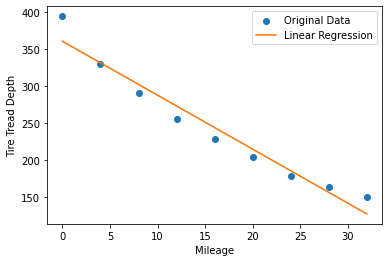

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['Mileage'], df['Tire Tread Depth'], label='Original Data')
ax.plot(df['Mileage'], df['Predicted Tire Tread Depth'], label='Linear Regression', color='#f97306')
ax.set(xlabel='Mileage', ylabel='Tire Tread Depth')
ax.legend()
plt.show()

In [13]:
# Task c
x_tmp = []
y_tmp = []
# drop tuple (32, 150.33)
for i in range(0, len(x)):
    if(x[i]!=32):
        x_tmp.append(x[i])

for i in range(0, len(y)):
    if(y[i]!=150.33):
        y_tmp.append(y[i])

print(x, y, x_tmp, y_tmp)

[0, 4, 8, 12, 16, 20, 24, 28, 32] [394.33, 329.5, 291.0, 255.17, 229.33, 204.83, 179.0, 163.83, 150.33] [0, 4, 8, 12, 16, 20, 24, 28] [394.33, 329.5, 291.0, 255.17, 229.33, 204.83, 179.0, 163.83]


In [14]:

coe = linear_regression(x_tmp, y_tmp)
print(coe)
y_reg = fit(x, coe)
y_reg_train = fit(x_tmp, coe)
print(y_reg, y_reg_train)

[366.3, -7.89]
[366.3, 334.74, 303.18, 271.62, 240.06, 208.5, 176.94, 145.38, 113.82] [366.3, 334.74, 303.18, 271.62, 240.06, 208.5, 176.94, 145.38]


In [15]:
train_mse = mean_squared_error(y_tmp, y_reg_train)
test_mse = mean_squared_error(y, y_reg)
train_mse = round(train_mse, 2)
test_mse = round(test_mse, 2)
print(train_mse, test_mse)

213.17 337.59


In [16]:
train_sqe = squared_error(y_tmp, y_reg_train)
test_sqe = squared_error(y, y_reg)
train_sse = sum(train_sqe)
test_sse = sum(test_sqe)
print(round(train_sse, 2), round(test_sse, 2))

1705.33 3038.31


In [17]:
# Task d
from sklearn.linear_model import LinearRegression
x = [0, 4, 8, 12, 16, 20, 24, 28, 32]
y = [394.33, 329.50, 291.00, 255.17, 229.33, 204.83, 179.00, 163.83, 150.33]

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

LR = LinearRegression().fit(x, y)
result = LR.predict(x)
result

array([[360.63666667],
       [331.51416667],
       [302.39166667],
       [273.26916667],
       [244.14666667],
       [215.02416667],
       [185.90166667],
       [156.77916667],
       [127.65666667]])

In [18]:
mse = mean_squared_error(y, result)
print(round(mse, 2))

281.28
